# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_AKARI-SEP_cat.fits')

In [17]:
cat[cat['F_PACS_100'] < 20]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J044620.500-534741.714,71.58541758478748,-53.79492045820555,5.961105,10.944111,2.0561714,8.98733,17.605894,2.8162785,7.510902e-05,0.00024739458,1.7049366e-05,9.032219e-05,1.0007894,0.99896556,1869.6498,2511.3652,0.0,0.0
HELP_J044618.091-534841.196,71.57537733921374,-53.811443201870404,6.0305047,15.489217,1.4597707,16.341759,41.800797,4.242778,7.510902e-05,0.00024739458,1.7049366e-05,9.032219e-05,1.0003405,0.9990315,2611.2168,2825.8752,0.0,0.0
HELP_J044604.854-534840.356,71.52022697817145,-53.811210095498794,6.680873,11.612042,3.0090287,8.494518,15.566584,3.2753718,0.00020111051,0.00012218939,8.093947e-06,2.8477472e-05,1.0014741,1.0257559,721.56775,163.42416,0.0,0.0
HELP_J044613.855-534848.229,71.55773087443434,-53.81339689925815,6.4239073,12.702508,2.1765294,26.922424,46.578815,10.130041,0.00020111051,0.00012218939,8.093947e-06,2.8477472e-05,1.0176979,1.0205138,417.18002,273.42062,0.0,0.0
HELP_J044607.593-534755.972,71.53163944752349,-53.798881136506516,8.30192,12.819645,4.3875394,5.2363567,10.734052,1.6179295,0.00020111051,0.00012218939,8.093947e-06,2.8477472e-05,1.0076996,1.0031129,361.31226,595.8235,0.0,0.0
HELP_J044607.189-534833.588,71.52995590942014,-53.80933009102162,2.6259146,5.428719,0.89310676,7.08275,15.18866,2.1583657,0.00020111051,0.00012218939,8.093947e-06,2.8477472e-05,1.0089792,1.0103348,517.9449,413.79288,0.0,0.0
HELP_J044605.976-534817.317,71.52489957113572,-53.804810199558666,4.1396484,8.4588995,1.2201927,20.056433,28.561138,11.310983,0.00020111051,0.00012218939,8.093947e-06,2.8477472e-05,1.0053809,1.0171927,808.7877,179.18628,0.0,0.0
HELP_J044606.404-534838.474,71.5266836337488,-53.81068709200003,2.28981,5.0380974,0.62738264,7.217006,14.711486,2.1690657,0.00020111051,0.00012218939,8.093947e-06,2.8477472e-05,1.0047306,1.0043432,608.42993,461.29236,0.0,0.0


In [4]:
cat

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J044532.713-542549.960,71.38630323580773,-54.43054452744563,512.0505,853.86273,150.64432,505.1501,856.5543,156.5987,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.99841607,0.99889755,4338.475,3426.1846,0.0,0.0
HELP_J044542.057-542729.540,71.42523654516819,-54.458205601467995,502.63593,843.92584,154.45784,488.63037,843.699,147.60936,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.9986363,0.99885124,3736.628,4372.328,0.0,0.0
HELP_J044537.233-542549.050,71.40513878275762,-54.43029166730459,501.38843,838.7053,153.16719,502.26685,838.5708,154.93507,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.9996342,0.99883896,3800.213,4310.3354,0.0,0.0
HELP_J044539.340-542603.261,71.41391753667342,-54.43423910758651,495.30884,850.62354,157.70703,496.68182,822.417,177.16177,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.9987349,0.9987144,4702.112,3540.7388,0.0,0.0
HELP_J044535.742-542519.468,71.39892372310322,-54.42207433349979,493.5757,841.8746,167.18492,481.0661,816.9355,165.13998,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.9988261,0.99922985,4200.9663,3433.315,0.0,0.0
HELP_J044540.988-542545.089,71.4207851290544,-54.42919126827938,507.794,860.2928,160.08907,500.5847,830.8059,173.19817,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.9987437,0.99885935,3991.65,4835.8516,0.0,0.0
HELP_J044540.326-542609.956,71.41802518008774,-54.43609893761438,505.273,855.9409,145.94984,504.03354,865.1517,146.0161,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.9982865,0.99851906,5820.7607,5669.1304,0.0,0.0
HELP_J044541.946-542635.742,71.42477563208395,-54.443261592012895,509.89786,844.91364,169.62537,503.38016,838.05505,149.00452,-0.0057937535,-0.015612483,0.0213409,0.06338138,0.99889106,0.9990993,3657.3687,4124.039,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

1.4999943
3


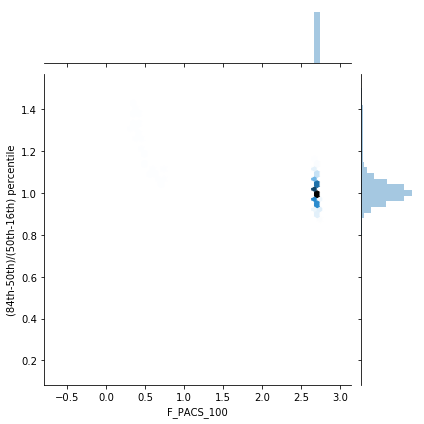

In [10]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 1.5 
n_use=skew > 1.5
g=sns.jointplot(x=np.log10(cat['F_PACS_100'][use]),y=skew[use] ,kind='hex')
print(np.max(skew[use]))
print(len(skew[n_use]))

1.4999937
8150
55286


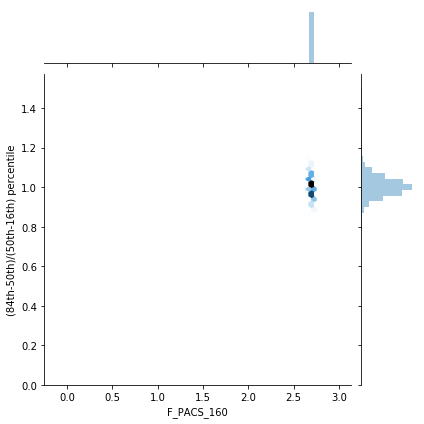

In [15]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 1.5 
n_use=skew> 1.5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

print(np.max(skew[use]))
print(len(skew[n_use]))
print(len(skew[use]))

## Add flag to catalogue

In [18]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))


In [19]:
ind100=(cat['Pval_res_100']>0.5) | ((cat['FErr_PACS_100_u']- cat['F_PACS_100'])>150)
ind160=(cat['Pval_res_160']>0.5) | ((cat['FErr_PACS_160_u']- cat['F_PACS_160'])>150)


In [20]:
print(ind100.sum(),ind160.sum(),len(cat))

49843 50463 63436


In [21]:
cat['flag_PACS_100'][ind100]=True
cat['flag_PACS_160'][ind160]=True

In [22]:
cat.write('./data/dmu26_XID+PACS_AKARI-SEP_cat_20190924.fits', format='fits',overwrite=True)


### Check Map

In [23]:
from astropy.io import fits
import pylab as plt

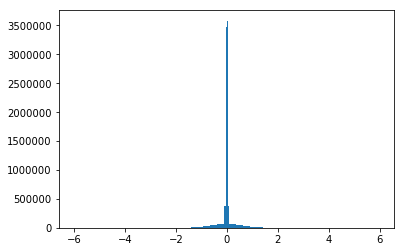

In [24]:
Pval=fits.open('./data/dmu26_XID+PACS_PACS_100_AKARI-SEP_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

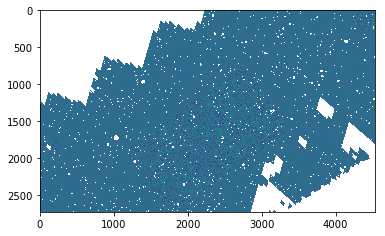

In [25]:
plt.imshow(Pval[1].data)